<a href="https://colab.research.google.com/github/FahmidaAkterShimu/Final-Project-using-NLP/blob/main/Hate_Speech_Detection_using_LSTM_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hate Speech Detection using LSTM**

In [102]:
# Importing libraries
import pandas as pd
import spacy
import numpy as np
import pickle
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('/content/labeled_data.csv')

In [56]:
df.shape

(24783, 7)

In [57]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [58]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [59]:
# 1. DELETING UNWANTED COLUMNS
df.drop(columns = ['Unnamed: 0',	'count',	'hate_speech',	'offensive_language',	'neither'],
        inplace = True)

In [60]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [61]:
# 2. CHECKING FOR NULL VALUES
df.isna().sum()

,0
class,0
tweet,0


In [62]:
df['tweet'].iloc[0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [63]:
df['tweet'].iloc[100]

'"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh'

In [64]:
df['tweet'].iloc[1000]

'&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;"@betysweetcocker: That pussy is just....&#128561; imma assume she just had a baby like..the day before"'

In [65]:
# 3. REPLACING SYMBOLS AND NUMBERS FROM TEXT
df['processed_tweet'] = df['tweet'].str.replace(r'[^a-zA-Z]', ' ', regex = True)

In [66]:
df.head()

,class,tweet,processed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [67]:
df['processed_tweet'].iloc[1000]

'                                                                 betysweetcocker  That pussy is just              imma assume she just had a baby like  the day before '

In [68]:
# 4. REPLACING MULTIPLE WHITESPACE CHARACTERS WITH SINGLE ONE
df['processed_tweet_2'] = df['processed_tweet'].str.replace(r'[\s]+', ' ', regex = True)

In [69]:
df.head()

,class,tweet,processed_tweet,processed_tweet_2
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...,RT mayasolovely As a woman you shouldn t comp...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...,RT C G Anderson viva based she look like a tr...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...,RT ShenikaRoberts The shit you hear about me ...


In [70]:
df['processed_tweet_2'].iloc[1000]

' betysweetcocker That pussy is just imma assume she just had a baby like the day before '

In [71]:
# Deleting unwanted columns
df.drop(columns = ['tweet', 'processed_tweet'], inplace = True)

In [72]:
df.head()

,class,processed_tweet_2
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


In [73]:
# 5. REPLACING THE TARGET VALUES
# df['class'].replace({0 : 'hate', 1 : 'offensive', 2 : 'neither'}, inplace = True)

In [74]:
df.head()

,class,processed_tweet_2
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


In [23]:
# Load out spacy modeule
nlp = spacy.load('en_core_web_sm')

In [75]:
# 6. LEMMATIZATION
def lemmatization(text):
  doc = nlp(text)
  lemmaList = [word.lemma_ for word in doc]
  return ' '.join(lemmaList)

In [76]:
df['lemma_tweet'] = df['processed_tweet_2'].apply(lemmatization)

In [77]:
df.head()

,class,processed_tweet_2,lemma_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...


In [78]:
df['processed_tweet_2'].iloc[67]

' Allyhaaaaa Lemmie eat a Oreo amp do these dishes One oreo Lol'

In [79]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [80]:
# 7. REMOVING STOPWORDS
def remove_stopwords(text):
  doc = nlp(text)
  no_stopwords_list = [word.text for word in doc if not word.is_stop]
  return ' '.join(no_stopwords_list)

In [81]:
df['final_tweet'] = df['lemma_tweet'].apply(remove_stopwords)

In [82]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [83]:
df['final_tweet'].iloc[67]

'   Allyhaaaaa Lemmie eat Oreo amp dish oreo lol'

In [84]:
df.head()

,class,processed_tweet_2,lemma_tweet,final_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...


In [85]:
# Lowercasing all Text
df['final_tweet'] = df['final_tweet'].str.lower()

In [86]:
# 8. ONE - HOT REPRESENTATION

vocab_size = 10000
one_hot_representation = [one_hot(words, vocab_size) for words in df['final_tweet']]

In [87]:
df['final_tweet'].iloc[0]

'   rt mayasolovely woman shouldn t complain clean house amp man trash'

In [88]:
one_hot_representation[100]

[6844,
 4569,
 6772,
 977,
 586,
 9528,
 4651,
 4266,
 8381,
 8244,
 7465,
 2141,
 5079,
 2603,
 9766,
 2875,
 6585]

In [89]:
# 9. PADDING AND EMBEDDING

sentence_length = 20
embedded_tweet = pad_sequences(one_hot_representation, padding='pre', maxlen = sentence_length)

In [90]:
embedded_tweet[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0, 2970, 2556,
       9342, 4099, 4266, 1053, 1360,  763, 6438, 2077, 4082], dtype=int32)

In [91]:
for i in range (0,4):
  print(embedded_tweet[i])

[   0    0    0    0    0    0    0    0    0 2970 2556 9342 4099 4266
 1053 1360  763 6438 2077 4082]
[   0    0    0    0    0    0    0 2970  181 4112 8131 1602 3838 5989
 5211 2339 8131 3603 3344 8204]
[   0    0    0    0    0    0    0    0 2970 1386  209 2970 2271 4036
 5693 2141 2678 7299 4540 2875]
[   0    0    0    0    0    0    0    0    0    0    0 2970 8640 4105
 7778 3476 7867 1043 2603 7607]


In [92]:
# 10. DIVIDING THE DATASET
X = np.array(embedded_tweet)
y = np.array(df['class'])

In [93]:
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [94]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

In [95]:
# 11. TRAIN - TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [96]:
X.shape, X_train.shape, X_test.shape

((42543, 20), (34034, 20), (8509, 20))

In [97]:
# 12. CREATING MODEL

dimension = 50
vocab_size = 10000

model = keras.Sequential([
    #embedding layer
    keras.layers.Embedding(vocab_size, dimension),

    # LSTM layer
    keras.layers.LSTM(100,return_sequences=True),
    keras.layers.Dropout(0.3),  # Dropout after first LSTM

    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.Dropout(0.3),  # Dropout after second LSTM

    keras.layers.LSTM(50),
    keras.layers.Dropout(0.3),  # Dropout before final dense layer

    #output layer
    keras.layers.Dense(3, activation = 'softmax')
])

#compilation
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [98]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [99]:
# EarlyStopping + ModelCheckpoint
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Saved model/best_model.keras',    # Save The Best Model
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

In [100]:
# Train the Model
M = model.fit(
    X_train, y_train,
    validation_split=0.2,   # this is important for val_loss monitoring
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/30
851/851 ━━━━━━━━━━━━━━━━━━━━ 53s 54ms/step - accuracy: 0.7596 - loss: 0.5618 - val_accuracy: 0.9191 - val_loss: 0.2430
Epoch 2/30
851/851 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.9345 - loss: 0.2015 - val_accuracy: 0.9229 - val_loss: 0.2358
Epoch 3/30
851/851 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9602 - loss: 0.1348 - val_accuracy: 0.9142 - val_loss: 0.2711
Epoch 4/30
851/851 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9741 - loss: 0.0935 - val_accuracy: 0.9054 - val_loss: 0.3591
Epoch 5/30
851/851 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9779 - loss: 0.0841 - val_accuracy: 0.9005 - val_loss: 0.3921


In [ ]:
# model.fit(X_train, y_train, epochs = 10, batch_size=32)

In [101]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100}')

266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9266 - loss: 0.2348
Model Accuracy : 92.31402277946472


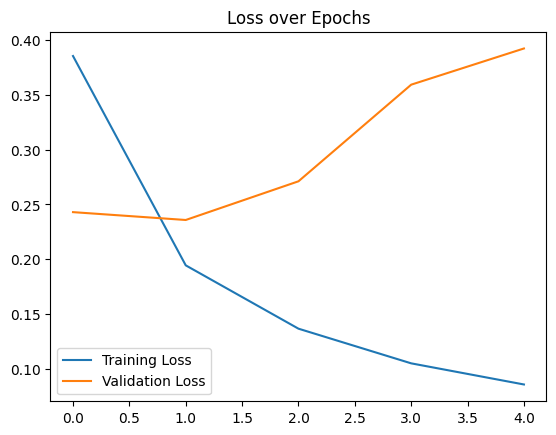

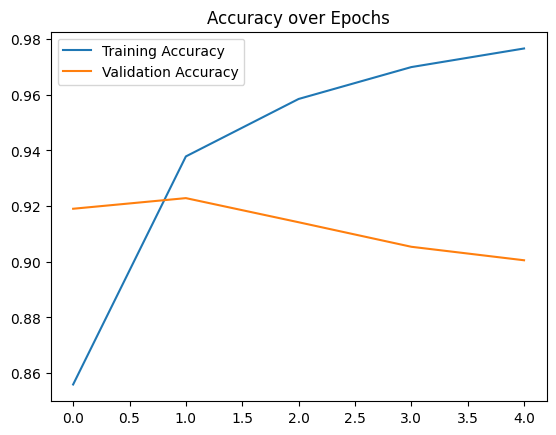

In [103]:
# Plot training vs validation loss
plt.plot(M.history['loss'], label='Training Loss')
plt.plot(M.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

# Plot training vs validation accuracy
plt.plot(M.history['accuracy'], label='Training Accuracy')
plt.plot(M.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

In [104]:
pred = np.argmax(model.predict(X_test), axis = -1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [105]:
y_test[:5]

array([1, 1, 0, 1, 2])

In [106]:
pred[:5]

array([1, 1, 0, 1, 2])

In [107]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3812
           1       0.93      0.94      0.94      3807
           2       0.84      0.78      0.81       890

    accuracy                           0.92      8509
   macro avg       0.90      0.89      0.89      8509
weighted avg       0.92      0.92      0.92      8509



Text(0.5, 1.0, 'Confusion Matrix')

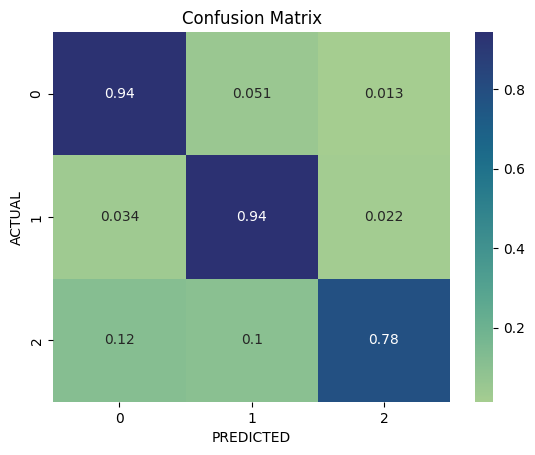

In [108]:
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest')
plt.xlabel('PREDICTED'),
plt.ylabel('ACTUAL');
plt.title('Confusion Matrix')

In [53]:
from google.colab import drive
drive.mount('/content/drive')  # mount once

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Clear the Mount Point First

!fusermount -u /content/drive
!rm -r /content/drive
from google.colab import drive
drive.mount('/content/drive')

fusermount: failed to unmount /content/drive: Invalid argument
Mounted at /content/drive


In [109]:
# Save trining & test data to Google Drive
np.save('/content/drive/MyDrive/Saved model/X_train.npy', X_train)
np.save('/content/drive/MyDrive/Saved model/X_test.npy', X_test)
np.save('/content/drive/MyDrive/Saved model/y_train.npy', y_train)
np.save('/content/drive/MyDrive/Saved model/y_test.npy', y_test)


In [110]:
# Save training history
with open('/content/drive/MyDrive/Saved model/history.pkl', 'wb') as f:
    pickle.dump(M.history, f)


In [111]:
# Save Final Predictions
np.save('/content/drive/MyDrive/Saved model/y_test.npy', y_test)
np.save('/content/drive/MyDrive/Saved model/pred.npy', pred)

In [112]:
# Save the model
model.save('/content/drive/MyDrive/Saved model/my_model.keras')

## Before Load the Model Import all the Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # mount again for load the model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the Trained/Savd Model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Saved model/my_model.keras')

In [ ]:
# Load the saved arrays
X_train = np.load('/content/drive/MyDrive/Saved model/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Saved model/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Saved model/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Saved model/y_test.npy')

In [ ]:
# Check the model accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100:.3f}%')

266/266 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9262 - loss: 0.2292
Model Accuracy : 92.220%


In [ ]:
# Replot from loaded history
with open('/content/drive/MyDrive/Saved model/history.pkl', 'rb') as f:
    loaded_history = pickle.load(f)

# Plot training vs validation loss
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs (Loaded)")
plt.show()

# Plot training vs validation accuracy
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(M.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

In [ ]:
# Load Final Predictions
y_test = np.load('/content/drive/MyDrive/Saved model/y_test.npy')
pred = np.load('/content/drive/MyDrive/Saved model/pred.npy')

In [ ]:
# Load Confusion Matrix
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest')
plt.xlabel('PREDICTED'),
plt.ylabel('ACTUAL');
plt.title('Confusion Matrix')

In [ ]:
# Load the Best Model Later
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Saved model/best_model.keras')